In [1]:
pip install statsbombpy

c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Competiciones disponibles:
   competition_id  season_id        competition_name season_name
0               9        281           1. Bundesliga   2023/2024
1               9         27           1. Bundesliga   2015/2016
2            1267        107  African Cup of Nations        2023
3              16          4        Champions League   2018/2019
4              16          1        Champions League   2017/2018


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Partidos de LaLiga 2020:
   match_id         home_team   away_team  match_date
0   3773386  Deportivo Alavés   Barcelona  2020-10-31
1   3773565           Granada   Barcelona  2021-01-09
2   3773457         Barcelona  Celta Vigo  2021-05-16
3   3773631        Real Betis   Barcelona  2021-02-07
4   3773665           Osasuna   Barcelona  2021-03-06


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


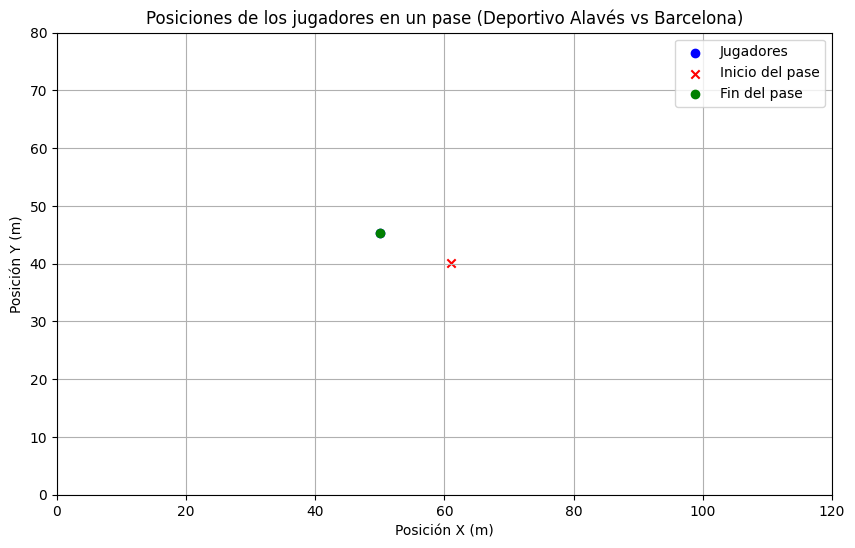

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb

competitions = sb.competitions()
print("Competiciones disponibles:")
print(competitions[["competition_id", "season_id", "competition_name", "season_name"]].head())

laliga_matches = sb.matches(competition_id=11, season_id=90)
print("\nPartidos de LaLiga 2020:")
print(laliga_matches[["match_id", "home_team", "away_team", "match_date"]].head())

match_id = laliga_matches.iloc[0]["match_id"] 
events = sb.events(match_id=match_id)
events_df = pd.DataFrame(events)

passes_df = events_df[events_df["type"] == "Pass"]

passes_with_360 = passes_df.dropna(subset=["related_events"])  
if passes_with_360.empty:
    print("No se encontraron pases con datos 360 disponibles en este partido.")
    exit()

sample_pass = passes_with_360.iloc[0]
pass_location = sample_pass["location"]
pass_end_location = sample_pass["pass_end_location"]

player_positions = []
for event_id in sample_pass["related_events"]:
    related_event = events_df[events_df["id"] == event_id]
    if not related_event.empty and "location" in related_event.columns:
        location = related_event.iloc[0]["location"]
        if isinstance(location, list) and len(location) == 2:  
            player_positions.append(location)

if not player_positions:
    print("No se encontraron datos de posiciones de jugadores en los eventos relacionados.")
    exit()

positions_df = pd.DataFrame(player_positions, columns=["x", "y"])

plt.figure(figsize=(10, 6))
plt.scatter(positions_df["x"], positions_df["y"], c='blue', label='Jugadores')
plt.scatter(pass_location[0], pass_location[1], c='red', marker='x', label='Inicio del pase')
plt.scatter(pass_end_location[0], pass_end_location[1], c='green', marker='o', label='Fin del pase')
plt.xlim(0, 120)
plt.ylim(0, 80)
plt.xlabel("Posición X (m)")
plt.ylabel("Posición Y (m)")
plt.title(f"Posiciones de los jugadores en un pase ({laliga_matches.iloc[0]['home_team']} vs {laliga_matches.iloc[0]['away_team']})")
plt.legend()
plt.grid()
plt.show()

In [3]:
passes_df

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:00.689,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:01.653,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:05.344,Pass,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:10.283,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:00:14.201,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:49:33.878,Pass,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:49:42.613,Pass,NaN
1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:49:45.451,Pass,NaN
1122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barcelona,217,00:49:48.743,Pass,NaN


In [ ]:
competitions = sb.competitions()
print("Competiciones disponibles:")
print(competitions[["competition_id", "season_id", "competition_name", "season_name"]].head())

laliga_matches = sb.matches(competition_id=11, season_id=90)
print("\nPartidos de LaLiga 2020:")
print(laliga_matches[["match_id", "home_team", "away_team", "match_date"]].head())

match_id = laliga_matches.iloc[0]["match_id"] 
events = sb.events(match_id=match_id)
events_df = pd.DataFrame(events)

Competiciones disponibles:
   competition_id  season_id        competition_name season_name
0               9        281           1. Bundesliga   2023/2024
1               9         27           1. Bundesliga   2015/2016
2            1267        107  African Cup of Nations        2023
3              16          4        Champions League   2018/2019
4              16          1        Champions League   2017/2018

Partidos de LaLiga 2020:
   match_id         home_team   away_team  match_date
0   3773386  Deportivo Alavés   Barcelona  2020-10-31
1   3773565           Granada   Barcelona  2021-01-09
2   3773457         Barcelona  Celta Vigo  2021-05-16
3   3773631        Real Betis   Barcelona  2021-02-07
4   3773665           Osasuna   Barcelona  2021-03-06


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [ ]:
passes_df["location"]

6        [61.0, 40.1]
7        [49.4, 44.9]
8        [48.1, 29.6]
9        [44.3, 50.2]
10       [49.0, 28.7]
            ...      
1119    [116.7, 57.0]
1120    [120.0, 80.0]
1121    [113.8, 68.9]
1122     [93.7, 66.1]
1123     [83.5, 47.9]
Name: location, Length: 1118, dtype: object

In [12]:
passes_df["pass_end_location"]

6        [50.0, 45.4]
7        [47.1, 29.6]
8        [35.5, 50.6]
9        [41.0, 29.7]
10       [57.8, 33.5]
            ...      
1119    [116.9, 55.5]
1120    [112.6, 72.4]
1121     [93.9, 67.3]
1122     [82.7, 48.1]
1123    [112.8, 38.9]
Name: pass_end_location, Length: 1118, dtype: object

In [5]:
tipos_eventos = events_df["type"].value_counts()
tipos_eventos

type
Pass                 1118
Ball Receipt*        1059
Carry                 888
Pressure              307
Ball Recovery          99
Duel                   63
Dribble                40
Block                  39
Clearance              39
Goal Keeper            35
Dispossessed           29
Shot                   29
Miscontrol             26
Foul Won               26
Foul Committed         26
Dribbled Past          26
Interception           14
Substitution           10
Half Start              4
Half End                4
Referee Ball-Drop       2
Starting XI             2
50/50                   2
Bad Behaviour           1
Injury Stoppage         1
Tactical Shift          1
Error                   1
Name: count, dtype: int64

In [ ]:
eventos_con_related = events_df[events_df["related_events"].notnull()]
tipos_eventos_con_related = eventos_con_related["type"].value_counts()

tipo_evento = tipos_eventos_con_related.index[3]
evento = eventos_con_related[events_df["type"] == tipo_evento].iloc[0]

info_evento = evento.dropna()
info_evento


C:\Users\samue\AppData\Local\Temp\ipykernel_22976\1062140881.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  evento = eventos_con_related[events_df["type"] == tipo_evento].iloc[0]


duration                                                       0.518353
id                                 5aad9a22-ba37-4857-878b-7dc82a28226c
index                                                                24
location                                                   [77.6, 48.8]
match_id                                                        3773386
minute                                                                0
period                                                                1
play_pattern                                              From Kick Off
player                                      Deyverson Brum Silva Acosta
player_id                                                       25134.0
position                                                 Center Forward
possession                                                            2
possession_team                                               Barcelona
possession_team_id                                              

# Pruebas 27/02/2025

In [ ]:
from statsbombpy import sb
import pandas as pd

competitions = sb.competitions()
laliga_competitions = competitions[competitions['competition_name'] == "La Liga"]

first_season = laliga_competitions.iloc[0]
season_id = first_season['season_id']

matches = sb.matches(competition_id=first_season['competition_id'], season_id=season_id)

selected_matches = matches.head(5)

passes_dict = {}

for match_id in selected_matches['match_id']:
    events = sb.events(match_id=match_id)
    
    passes = events[events['type'] == "Pass"].copy()
    
    passes['start_x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['start_y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    
    passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    
    passes_dict[match_id] = passes[['player', 'team', 'start_x', 'start_y', 'end_x', 'end_y']]

first_match_id = selected_matches.iloc[0]['match_id']
print(f"Pases del partido {first_match_id} ({selected_matches.iloc[0]['home_team']} vs {selected_matches.iloc[0]['away_team']}):")
print(passes_dict[first_match_id].head())


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\s

Pases del partido 3773386 (Deportivo Alavés vs Barcelona):
                      player       team  start_x  start_y  end_x  end_y
6          Antoine Griezmann  Barcelona     61.0     40.1   50.0   45.4
7   Sergio Busquets i Burgos  Barcelona     49.4     44.9   47.1   29.6
8            Frenkie de Jong  Barcelona     48.1     29.6   35.5   50.6
9      Gerard Piqué Bernabéu  Barcelona     44.3     50.2   41.0   29.7
10           Clément Lenglet  Barcelona     49.0     28.7   57.8   33.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsbombpy import sb

competitions = sb.competitions()
laliga_competitions = competitions[competitions['competition_name'] == "La Liga"]

first_season = laliga_competitions.iloc[0]
season_id = first_season['season_id']

matches = sb.matches(competition_id=first_season['competition_id'], season_id=season_id)

selected_matches = matches.head(5)

team_metrics = {}

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

for match_id in selected_matches['match_id']:
    events = sb.events(match_id=match_id)
    
    passes = events[events['type'] == "Pass"].copy()
    
    passes['start_x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['start_y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    passes['distance'] = passes.apply(lambda row: euclidean_distance(row['start_x'], row['start_y'], row['end_x'], row['end_y']), axis=1)
    passes['verticality'] = (passes['end_y'] - passes['start_y']) / passes['distance']

    for team in passes['team'].unique():
        team_passes = passes[passes['team'] == team]
        avg_distance = team_passes['distance'].mean()
        verticality = team_passes['verticality'].mean()
        forward_passes = (team_passes['verticality'] > 0).sum() / len(team_passes)
        num_passes = len(team_passes)

        if team not in team_metrics:
            team_metrics[team] = []
        team_metrics[team].append({
            'match_id': match_id,
            'avg_distance': avg_distance,
            'verticality': verticality,
            'forward_passes': forward_passes,
            'num_passes': num_passes
        })

for team, metrics in team_metrics.items():
    print(f"\nMétricas de {team}:")
    for m in metrics:
        print(m)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\s


Métricas de Barcelona:
{'match_id': 3773386, 'avg_distance': 15.878273104085734, 'verticality': 0.011936250123328176, 'forward_passes': 0.5056818181818182, 'num_passes': 880}
{'match_id': 3773565, 'avg_distance': 17.890438505389188, 'verticality': 0.009651986473739198, 'forward_passes': 0.5096385542168674, 'num_passes': 830}
{'match_id': 3773457, 'avg_distance': 19.425877903861142, 'verticality': 0.03714429647752936, 'forward_passes': 0.5137976346911958, 'num_passes': 761}
{'match_id': 3773631, 'avg_distance': 17.750848238453273, 'verticality': 0.0005498378432728958, 'forward_passes': 0.4973614775725594, 'num_passes': 758}
{'match_id': 3773665, 'avg_distance': 17.709955336472582, 'verticality': -0.01987081783465168, 'forward_passes': 0.4795783926218709, 'num_passes': 759}

Métricas de Deportivo Alavés:
{'match_id': 3773386, 'avg_distance': 24.619939707735895, 'verticality': 0.01874481468097658, 'forward_passes': 0.5168067226890757, 'num_passes': 238}

Métricas de Granada:
{'match_id':

c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


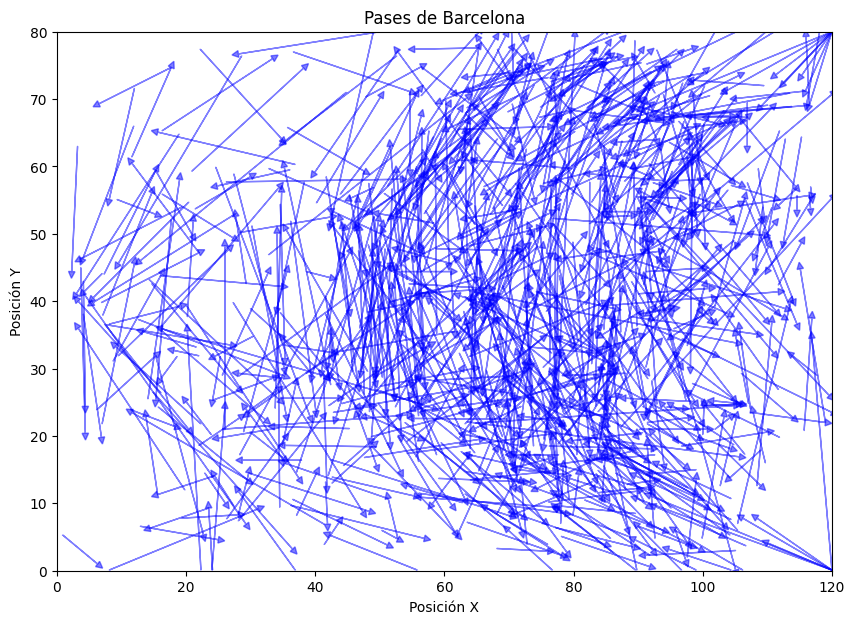

In [ ]:
def plot_passes(passes, team_name):
    plt.figure(figsize=(10, 7))
    plt.xlim(0, 120)  
    plt.ylim(0, 80)
    plt.title(f"Pases de {team_name}")

    for _, row in passes.iterrows():
        plt.arrow(row['start_x'], row['start_y'], row['end_x'] - row['start_x'], row['end_y'] - row['start_y'], 
                  head_width=1, head_length=1, fc='blue', ec='blue', alpha=0.5)

    plt.xlabel("Posición X")
    plt.ylabel("Posición Y")
    plt.show()

team_to_plot = list(team_metrics.keys())[0]
passes_to_plot = sb.events(match_id=selected_matches.iloc[0]['match_id'])
passes_to_plot = passes_to_plot[passes_to_plot['team'] == team_to_plot]
passes_to_plot = passes_to_plot[passes_to_plot['type'] == "Pass"]

passes_to_plot['start_x'] = passes_to_plot['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
passes_to_plot['start_y'] = passes_to_plot['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
passes_to_plot['end_x'] = passes_to_plot['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
passes_to_plot['end_y'] = passes_to_plot['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

plot_passes(passes_to_plot, team_to_plot)


Los valores de Hurst obtenidos para cada equipo nos permiten caracterizar su estilo de juego:

𝐻
≈
0.5
H≈0.5 → Juego aleatorio, sin un patrón claro.


𝐻>0.5
H>0.5 → Juego de posesión y control, pases en secuencia predecible.


𝐻<0.5
H<0.5 → Juego vertical y agresivo, cambios bruscos de dirección.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbm import FBM
from statsbombpy import sb
from scipy.stats import linregress

def estimate_hurst(series):
    N = len(series)
    if N < 10: 
        return None

    lags = np.log(np.arange(2, N//2))
    rs_values = []

    for lag in range(2, N//2):
        mean_series = np.mean(series[:lag])
        Z = np.cumsum(series[:lag] - mean_series)
        R = np.max(Z) - np.min(Z)
        S = np.std(series[:lag])

        if S > 0:
            rs_values.append(R / S)
        else:
            rs_values.append(0)

    slope, _, _, _, _ = linregress(lags, np.log(rs_values))
    return slope

competitions = sb.competitions()
laliga = competitions[competitions['competition_name'] == "La Liga"]
season_id = laliga.iloc[0]['season_id']

matches = sb.matches(competition_id=laliga.iloc[0]['competition_id'], season_id=season_id).head(5)

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    home_team = match['home_team']
    away_team = match['away_team']

    print(f"Procesando partido {match_id}: {home_team} vs {away_team} ({match_date})")

    events = sb.events(match_id=match_id)
    
    passes = events[events['type'] == "Pass"].copy()
    
    passes['start_x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['start_y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    for team in passes['team'].unique():
        team_passes = passes[passes['team'] == team]
        
        if len(team_passes) < 10: 
            continue

        traj_x = np.cumsum(team_passes['end_x'].values - team_passes['start_x'].values)
        traj_y = np.cumsum(team_passes['end_y'].values - team_passes['start_y'].values)

        hurst_x = estimate_hurst(traj_x)
        hurst_y = estimate_hurst(traj_y)

        if hurst_x is not None and hurst_y is not None:
            hurst_avg = (hurst_x + hurst_y) / 2 
            
            hurst_results.append({
                "match_id": match_id,
                "date": match_date,
                "team": team,
                "hurst": hurst_avg
            })

df_hurst = pd.DataFrame(hurst_results)

print(df_hurst)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773386: Deportivo Alavés vs Barcelona (2020-10-31)
Procesando partido 3773565: Granada vs Barcelona (2021-01-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773457: Barcelona vs Celta Vigo (2021-05-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773631: Real Betis vs Barcelona (2021-02-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773665: Osasuna vs Barcelona (2021-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


   match_id        date              team     hurst
0   3773386  2020-10-31         Barcelona  1.028426
1   3773386  2020-10-31  Deportivo Alavés  0.907871
2   3773565  2021-01-09         Barcelona  0.938266
3   3773565  2021-01-09           Granada  1.022018
4   3773457  2021-05-16         Barcelona  1.087069
5   3773457  2021-05-16        Celta Vigo  1.028629
6   3773631  2021-02-07        Real Betis  1.008618
7   3773631  2021-02-07         Barcelona  1.037119
8   3773665  2021-03-06         Barcelona  1.065681
9   3773665  2021-03-06           Osasuna  0.944701


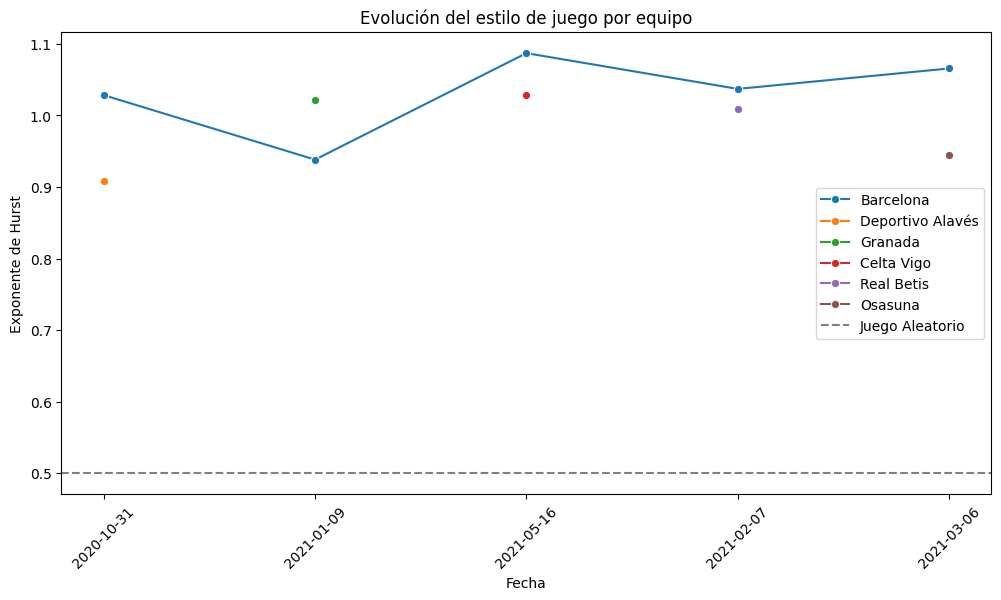

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hurst, x="date", y="hurst", hue="team", marker="o", linestyle="-")
plt.axhline(y=0.5, color='gray', linestyle='--', label="Juego Aleatorio")
plt.xlabel("Fecha")
plt.ylabel("Exponente de Hurst")
plt.title("Evolución del estilo de juego por equipo")
plt.legend()
plt.xticks(rotation=45)
plt.show()


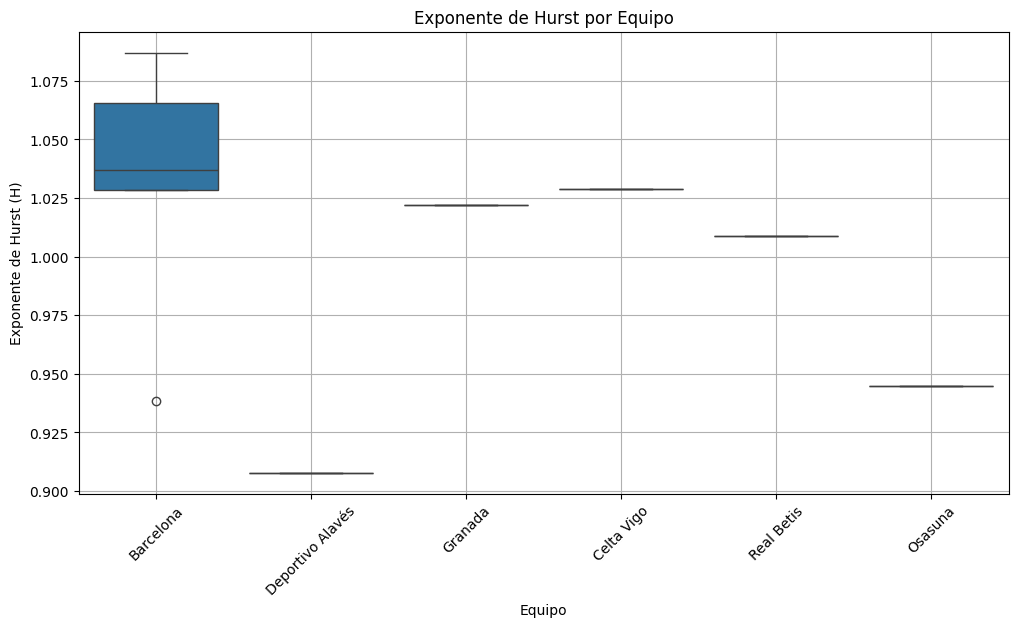

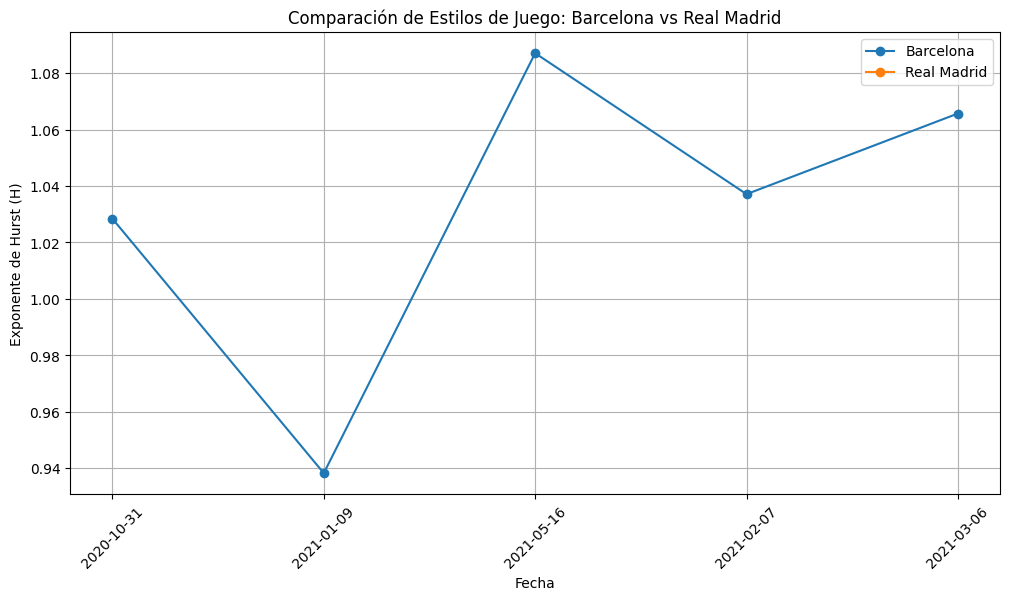

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hurst_df = pd.DataFrame(hurst_results)

plt.figure(figsize=(12, 6))
sns.boxplot(data=hurst_df, x='team', y='hurst')
plt.title('Exponente de Hurst por Equipo')
plt.xticks(rotation=45)
plt.ylabel('Exponente de Hurst (H)')
plt.xlabel('Equipo')
plt.grid(True)
plt.show()

def compare_teams(team1, team2, hurst_df):
    team1_data = hurst_df[hurst_df['team'] == team1]
    team2_data = hurst_df[hurst_df['team'] == team2]
    
    plt.figure(figsize=(12, 6))
    plt.plot(team1_data['date'], team1_data['hurst'], marker='o', label=team1)
    plt.plot(team2_data['date'], team2_data['hurst'], marker='o', label=team2)
    plt.title(f'Comparación de Estilos de Juego: {team1} vs {team2}')
    plt.xlabel('Fecha')
    plt.ylabel('Exponente de Hurst (H)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

compare_teams('Barcelona', 'Real Madrid', hurst_df)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773386: Deportivo Alavés vs Barcelona (2020-10-31)
Procesando partido 3773565: Granada vs Barcelona (2021-01-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773457: Barcelona vs Celta Vigo (2021-05-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773631: Real Betis vs Barcelona (2021-02-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773665: Osasuna vs Barcelona (2021-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


   match_id        date              team     hurst
0   3773386  2020-10-31         Barcelona  1.054193
1   3773386  2020-10-31  Deportivo Alavés  1.026047
2   3773565  2021-01-09         Barcelona  1.042925
3   3773565  2021-01-09           Granada  1.028666
4   3773457  2021-05-16         Barcelona  1.058427
5   3773457  2021-05-16        Celta Vigo  1.022694
6   3773631  2021-02-07        Real Betis  1.049850
7   3773631  2021-02-07         Barcelona  1.036400
8   3773665  2021-03-06         Barcelona  1.024353
9   3773665  2021-03-06           Osasuna  1.006070


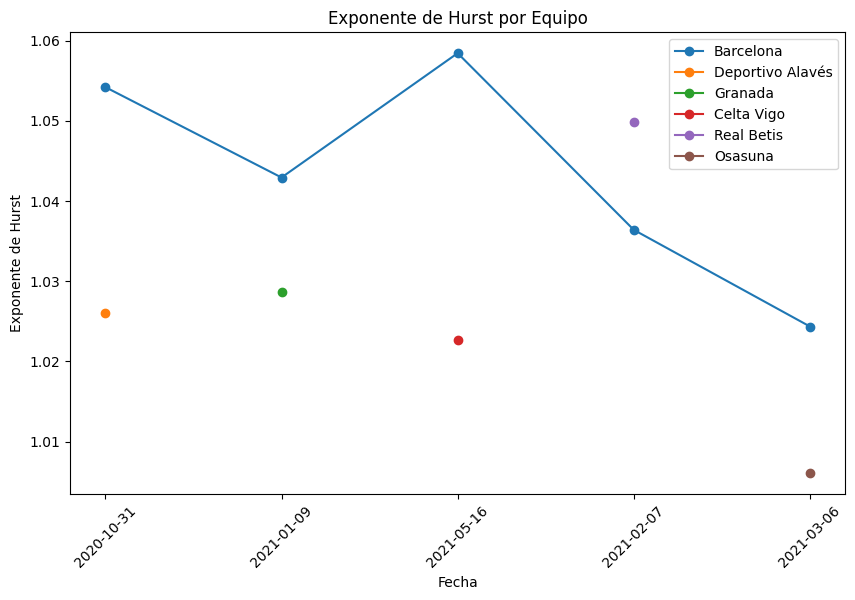

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy.stats import linregress

def estimate_hurst(series):
    N = len(series)
    if N < 10: 
        return None

    lags = np.log(np.arange(2, N//2))
    rs_values = []

    for lag in range(2, N//2):
        mean_series = np.mean(series[:lag])
        Z = np.cumsum(series[:lag] - mean_series)
        R = np.max(Z) - np.min(Z)
        S = np.std(series[:lag])

        if S > 0:
            rs_values.append(R / S)
        else:
            rs_values.append(0)

    slope, _, _, _, _ = linregress(lags, np.log(rs_values))
    return slope

competitions = sb.competitions()
laliga = competitions[competitions['competition_name'] == "La Liga"]
season_id = laliga.iloc[0]['season_id']

matches = sb.matches(competition_id=laliga.iloc[0]['competition_id'], season_id=season_id).head(5)

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    home_team = match['home_team']
    away_team = match['away_team']

    print(f"Procesando partido {match_id}: {home_team} vs {away_team} ({match_date})")

    events = sb.events(match_id=match_id)
    
    selected_events = events[events['type'].isin(["Pass", "Carry", "Dribble"])].copy()
    
    selected_events['start_x'] = selected_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['start_y'] = selected_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    selected_events['end_x'] = selected_events['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['end_y'] = selected_events['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    for team in selected_events['team'].unique():
        team_events = selected_events[selected_events['team'] == team]
        
        if len(team_events) < 10:  
            continue

        traj_x = np.cumsum(team_events['end_x'].values - team_events['start_x'].values)
        traj_y = np.cumsum(team_events['end_y'].values - team_events['start_y'].values)

        hurst_x = estimate_hurst(traj_x)
        hurst_y = estimate_hurst(traj_y)

        if hurst_x is not None and hurst_y is not None:
            hurst_avg = (hurst_x + hurst_y) / 2 
            
            hurst_results.append({
                "match_id": match_id,
                "date": match_date,
                "team": team,
                "hurst": hurst_avg
            })

df_hurst = pd.DataFrame(hurst_results)

print(df_hurst)

plt.figure(figsize=(10, 6))
for team in df_hurst['team'].unique():
    team_data = df_hurst[df_hurst['team'] == team]
    plt.plot(team_data['date'], team_data['hurst'], marker='o', label=team)
    
plt.title("Exponente de Hurst por Equipo")
plt.xlabel("Fecha")
plt.ylabel("Exponente de Hurst")
plt.xticks(rotation=45)
plt.legend()
plt.show()


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773386: Deportivo Alavés vs Barcelona (2020-10-31)
Procesando partido 3773565: Granada vs Barcelona (2021-01-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773457: Barcelona vs Celta Vigo (2021-05-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773631: Real Betis vs Barcelona (2021-02-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773665: Osasuna vs Barcelona (2021-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


   match_id        date              team     hurst
0   3773386  2020-10-31         Barcelona  1.028426
1   3773386  2020-10-31  Deportivo Alavés  0.907871
2   3773565  2021-01-09         Barcelona  0.938266
3   3773565  2021-01-09           Granada  1.022018
4   3773457  2021-05-16         Barcelona  1.087069
5   3773457  2021-05-16        Celta Vigo  1.028629
6   3773631  2021-02-07        Real Betis  1.008618
7   3773631  2021-02-07         Barcelona  1.037119
8   3773665  2021-03-06         Barcelona  1.065681
9   3773665  2021-03-06           Osasuna  0.944701


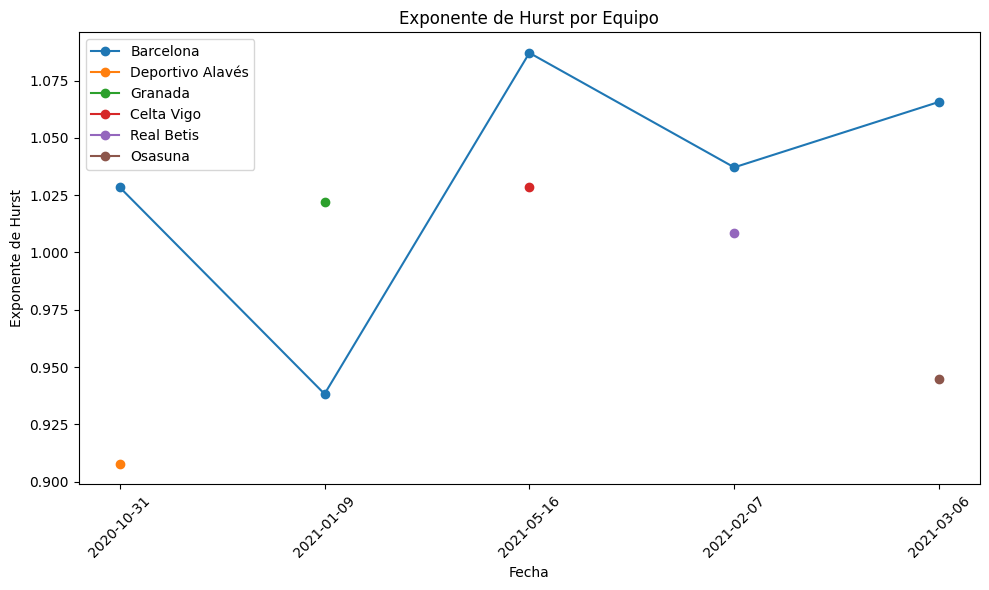

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy.stats import linregress

def estimate_hurst(series):
    N = len(series)
    if N < 10:  
        return None

    lags = np.log(np.arange(2, N // 2))
    rs_values = []

    for lag in range(2, N // 2):
        mean_series = np.mean(series[:lag])
        Z = np.cumsum(series[:lag] - mean_series)
        R = np.max(Z) - np.min(Z)
        S = np.std(series[:lag])

        if S > 0:
            rs_values.append(R / S)
        else:
            rs_values.append(0)

    slope, _, _, _, _ = linregress(lags, np.log(rs_values))
    return slope

competitions = sb.competitions()
laliga = competitions[competitions['competition_name'] == "La Liga"]
season_id = laliga.iloc[0]['season_id']

matches = sb.matches(competition_id=laliga.iloc[0]['competition_id'], season_id=season_id).head(5)

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    home_team = match['home_team']
    away_team = match['away_team']

    print(f"Procesando partido {match_id}: {home_team} vs {away_team} ({match_date})")

    events = sb.events(match_id=match_id)

    selected_events = events[events['type'].isin(["Pass", "Carry", "Dribble"])].copy()
    
    selected_events['start_x'] = selected_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['start_y'] = selected_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    selected_events['end_x'] = selected_events['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['end_y'] = selected_events['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    selected_events = selected_events.dropna(subset=['start_x', 'start_y', 'end_x', 'end_y'])

    for team in selected_events['team'].unique():
        team_events = selected_events[selected_events['team'] == team]
        
        if len(team_events) < 10: 
            continue

        traj_x = np.cumsum(team_events['end_x'].values - team_events['start_x'].values)
        traj_y = np.cumsum(team_events['end_y'].values - team_events['start_y'].values)

        hurst_x = estimate_hurst(traj_x)
        hurst_y = estimate_hurst(traj_y)

        if hurst_x is not None and hurst_y is not None:
            hurst_avg = (hurst_x + hurst_y) / 2 
            
            hurst_results.append({
                "match_id": match_id,
                "date": match_date,
                "team": team,
                "hurst": hurst_avg
            })

df_hurst = pd.DataFrame(hurst_results)

print(df_hurst)

plt.figure(figsize=(10, 6))
for team in df_hurst['team'].unique():
    team_data = df_hurst[df_hurst['team'] == team]
    plt.plot(team_data['date'], team_data['hurst'], marker='o', label=team)
    
plt.title("Exponente de Hurst por Equipo")
plt.xlabel("Fecha")
plt.ylabel("Exponente de Hurst")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  
plt.show()


toda laliga

c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773386: Deportivo Alavés vs Barcelona (2020-10-31)
Procesando partido 3773565: Granada vs Barcelona (2021-01-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773457: Barcelona vs Celta Vigo (2021-05-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773631: Real Betis vs Barcelona (2021-02-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773665: Osasuna vs Barcelona (2021-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773497: Real Madrid vs Barcelona (2021-04-10)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773660: Barcelona vs Levante UD (2020-12-13)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773593: Barcelona vs Villarreal (2020-09-27)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773466: Celta Vigo vs Barcelona (2020-10-01)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773585: Barcelona vs Real Madrid (2020-10-24)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773552: Huesca vs Barcelona (2021-01-03)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773672: Barcelona vs Sevilla (2020-10-04)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773587: Getafe vs Barcelona (2020-10-17)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773656: Atlético Madrid vs Barcelona (2020-11-21)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773377: Barcelona vs Valencia (2020-12-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773586: Barcelona vs Granada (2021-04-29)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773372: Barcelona vs Atlético Madrid (2021-05-08)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\samue\AppData\Local\Temp\ipykernel_22976\4140230405.py:27: RuntimeWarning: divide by zero encountered in log
  slope, _, _, _, _ = linregress(lags, np.log(rs_values))
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773387: Levante UD vs Barcelona (2021-05-11)
Procesando partido 3773695: Valencia vs Barcelona (2021-05-02)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773369: Barcelona vs Huesca (2021-03-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773661: Barcelona vs Getafe (2021-04-22)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773597: Real Sociedad vs Barcelona (2021-03-21)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773523: Barcelona vs Real Sociedad (2020-12-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\samue\AppData\Local\Temp\ipykernel_22976\4140230405.py:27: RuntimeWarning: divide by zero encountered in log
  slope, _, _, _, _ = linregress(lags, np.log(rs_values))
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773571: Real Valladolid vs Barcelona (2020-12-22)
Procesando partido 3773428: Cádiz vs Barcelona (2020-12-05)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3764661: Athletic Club vs Barcelona (2021-01-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773526: Barcelona vs Deportivo Alavés (2021-02-13)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773474: Barcelona vs Real Valladolid (2021-04-05)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773625: Sevilla vs Barcelona (2021-02-27)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773403: Barcelona vs Athletic Club (2021-01-31)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773547: Barcelona vs Osasuna (2020-11-29)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773415: Barcelona vs Cádiz (2021-02-21)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3764440: Barcelona vs Elche (2021-02-24)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773689: Villarreal vs Barcelona (2021-04-25)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3773477: Barcelona vs Real Betis (2020-11-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    match_id        date              team     hurst
0    3773386  2020-10-31  Deportivo Alavés  1.026047
1    3773386  2020-10-31         Barcelona  1.054193
2    3773565  2021-01-09           Granada  1.028666
3    3773565  2021-01-09         Barcelona  1.042925
4    3773457  2021-05-16         Barcelona  1.058427
..       ...         ...               ...       ...
65   3764440  2021-02-24             Elche  1.016651
66   3773689  2021-04-25        Villarreal  0.997651
67   3773689  2021-04-25         Barcelona  1.089045
68   3773477  2020-11-07         Barcelona  0.990824
69   3773477  2020-11-07        Real Betis  1.003369

[70 rows x 4 columns]


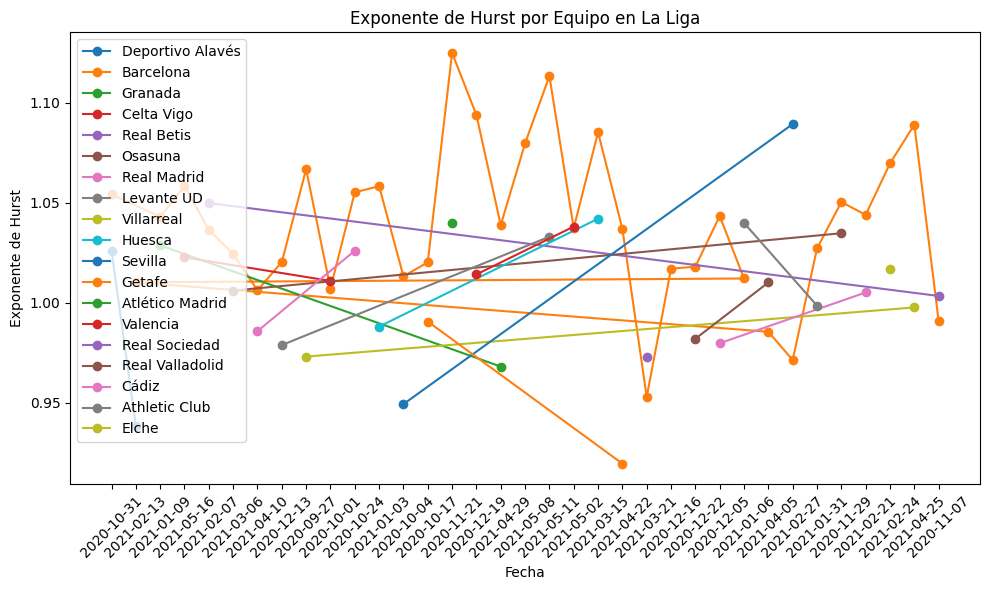

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy.stats import linregress

def estimate_hurst(series):
    N = len(series)
    if N < 10: 
        return None

    lags = np.log(np.arange(2, N // 2))
    rs_values = []

    for lag in range(2, N // 2):
        mean_series = np.mean(series[:lag])
        Z = np.cumsum(series[:lag] - mean_series)
        R = np.max(Z) - np.min(Z)
        S = np.std(series[:lag])

        if S > 0:
            rs_values.append(R / S)
        else:
            rs_values.append(0)

    slope, _, _, _, _ = linregress(lags, np.log(rs_values))
    return slope

competitions = sb.competitions()
laliga = competitions[competitions['competition_name'] == "La Liga"]
season_id = laliga.iloc[0]['season_id']

matches = sb.matches(competition_id=laliga.iloc[0]['competition_id'], season_id=season_id)

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    home_team = match['home_team']
    away_team = match['away_team']

    print(f"Procesando partido {match_id}: {home_team} vs {away_team} ({match_date})")

    events = sb.events(match_id=match_id)

    selected_events = events[events['type'].isin(["Pass", "Carry", "Dribble"])].copy()

    selected_events['start_x'] = selected_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['start_y'] = selected_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    selected_events['end_x'] = selected_events['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    selected_events['end_y'] = selected_events['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    for team in [home_team, away_team]:
        team_events = selected_events[selected_events['team'] == team]

        if len(team_events) < 10:  
            continue

        traj_x = np.cumsum(team_events['end_x'].values - team_events['start_x'].values)
        traj_y = np.cumsum(team_events['end_y'].values - team_events['start_y'].values)

        hurst_x = estimate_hurst(traj_x)
        hurst_y = estimate_hurst(traj_y)

        if hurst_x is not None and hurst_y is not None:
            hurst_avg = (hurst_x + hurst_y) / 2
            
            hurst_results.append({
                "match_id": match_id,
                "date": match_date,
                "team": team,
                "hurst": hurst_avg
            })

df_hurst = pd.DataFrame(hurst_results)

print(df_hurst)

plt.figure(figsize=(10, 6))
for team in df_hurst['team'].unique():
    team_data = df_hurst[df_hurst['team'] == team]
    plt.plot(team_data['date'], team_data['hurst'], marker='o', label=team)

plt.title("Exponente de Hurst por Equipo en La Liga")
plt.xlabel("Fecha")
plt.ylabel("Exponente de Hurst")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
df_hurst

,match_id,date,team,hurst
0,3773386,2020-10-31,Deportivo Alavés,1.026047
1,3773386,2020-10-31,Barcelona,1.054193
2,3773565,2021-01-09,Granada,1.028666
3,3773565,2021-01-09,Barcelona,1.042925
4,3773457,2021-05-16,Barcelona,1.058427
...,...,...,...,...
65,3764440,2021-02-24,Elche,1.016651
66,3773689,2021-04-25,Villarreal,0.997651
67,3773689,2021-04-25,Barcelona,1.089045
68,3773477,2020-11-07,Barcelona,0.990824


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt  
from statsbombpy import sb

def estimate_hurst_wavelet(series):
    if len(series) < 10:  
        return None

    coeffs = pywt.wavedec(series, 'haar', level=3)  
    energies = [np.sum(np.square(c)) for c in coeffs[1:]]  

    scales = np.array([2**i for i in range(1, len(energies) + 1)]) 
    log_scales = np.log(scales)
    log_energies = np.log(energies)

    slope, _ = np.polyfit(log_scales, log_energies, 1)  
    hurst = -slope / 2  

    return hurst

matches = sb.matches(competition_id=11, season_id=27)  

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    home_team = match['home_team']
    away_team = match['away_team']

    print(f"Procesando partido {match_id}: {home_team} vs {away_team} ({match_date})")

    events = sb.events(match_id=match_id)

    passes = events[events['type'] == "Pass"].copy()
    
    passes['start_x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['start_y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
    passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
    passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

    for team in passes['team'].unique():
        team_passes = passes[passes['team'] == team]

        if len(team_passes) < 10: 
            continue

        traj_x = np.cumsum(team_passes['end_x'].values - team_passes['start_x'].values)
        traj_y = np.cumsum(team_passes['end_y'].values - team_passes['start_y'].values)

        hurst_x = estimate_hurst_wavelet(traj_x)
        hurst_y = estimate_hurst_wavelet(traj_y)

        if hurst_x is not None and hurst_y is not None:
            hurst_avg = (hurst_x + hurst_y) / 2  
            
            hurst_results.append({
                "match_id": match_id,
                "date": match_date,
                "team": team,
                "hurst": hurst_avg
            })

df_hurst = pd.DataFrame(hurst_results)

df_hurst.to_csv("hurst_laliga_2015_2016.csv", index=False)

print(df_hurst.head())

plt.figure(figsize=(12, 6))
for team in df_hurst['team'].unique():
    team_data = df_hurst[df_hurst['team'] == team]
    plt.plot(team_data['date'], team_data['hurst'], marker='o', linestyle='-', label=team)
    
plt.title("Exponente de Hurst por Equipo (LaLiga 2015/2016)")
plt.xlabel("Fecha")
plt.ylabel("Exponente de Hurst")
plt.xticks(rotation=45)
plt.legend()
plt.show()


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825848: Levante UD vs Eibar (2015-09-23)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825895: Las Palmas vs Sevilla (2015-09-23)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825894: RC Deportivo La Coruña vs Getafe (2016-05-01)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825855: Málaga vs Levante UD (2016-05-02)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825908: Espanyol vs Eibar (2016-05-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825883: Málaga vs Las Palmas (2016-05-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825900: Sporting Gijón vs Villarreal (2016-05-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825902: Rayo Vallecano vs Levante UD (2016-05-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825876: Real Betis vs Getafe (2016-05-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825846: RC Deportivo La Coruña vs Real Madrid (2016-05-14)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825869: Athletic Club vs Sevilla (2016-05-14)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825882: Atlético Madrid vs Celta Vigo (2016-05-14)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825849: Valencia vs Real Sociedad (2016-05-13)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825860: Levante UD vs Atlético Madrid (2016-05-08)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825847: Eibar vs RC Deportivo La Coruña (2016-04-23)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825817: Getafe vs Eibar (2016-03-18)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825778: Real Betis vs Sporting Gijón (2016-02-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825777: Levante UD vs Getafe (2016-02-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825740: Eibar vs Granada (2016-01-18)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825875: Villarreal vs Real Sociedad (2016-04-24)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825884: Sevilla vs Real Betis (2016-04-24)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825842: Levante UD vs Athletic Club (2016-04-24)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825890: Atlético Madrid vs Málaga (2016-04-23)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825871: Las Palmas vs Espanyol (2016-04-22)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825896: Granada vs Levante UD (2016-04-21)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825841: Real Sociedad vs Getafe (2016-04-21)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825843: Málaga vs Rayo Vallecano (2016-04-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825839: Sporting Gijón vs Sevilla (2016-04-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825838: Athletic Club vs Atlético Madrid (2016-04-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825840: Valencia vs Eibar (2016-04-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825837: Real Betis vs Las Palmas (2016-04-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825836: Rayo Vallecano vs Villarreal (2016-04-17)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825835: Málaga vs Athletic Club (2016-04-17)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825834: Atlético Madrid vs Granada (2016-04-17)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825906: Sevilla vs RC Deportivo La Coruña (2016-04-17)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825897: Eibar vs Real Sociedad (2016-04-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825889: Celta Vigo vs Real Betis (2016-04-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825833: Getafe vs Real Madrid (2016-04-16)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825857: Levante UD vs Espanyol (2016-04-15)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825863: RC Deportivo La Coruña vs Las Palmas (2016-04-11)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825829: Athletic Club vs Rayo Vallecano (2016-04-10)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825830: Villarreal vs Getafe (2016-04-10)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825832: Sporting Gijón vs Celta Vigo (2016-04-10)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825831: Valencia vs Sevilla (2016-04-10)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825828: Espanyol vs Atlético Madrid (2016-04-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825827: Real Betis vs Levante UD (2016-04-09)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825826: Granada vs Málaga (2016-04-08)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825825: Levante UD vs Sporting Gijón (2016-04-04)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825824: Eibar vs Villarreal (2016-04-03)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825823: Sevilla vs Real Sociedad (2016-04-03)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825905: Málaga vs Espanyol (2016-04-03)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825822: Las Palmas vs Valencia (2016-04-02)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825821: Espanyol vs Athletic Club (2016-03-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825820: Real Madrid vs Sevilla (2016-03-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825819: Valencia vs Celta Vigo (2016-03-20)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825818: Real Sociedad vs Las Palmas (2016-03-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000022F2C385910>>
Traceback (most recent call last):
  File "C:\Users\samue\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1533, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


Procesando partido 3825887: Granada vs Rayo Vallecano (2016-03-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825907: Sporting Gijón vs Atlético Madrid (2016-03-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825903: Real Betis vs Málaga (2016-03-19)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825816: Sevilla vs Villarreal (2016-03-13)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825815: Levante UD vs Valencia (2016-03-13)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825858: Rayo Vallecano vs Eibar (2016-03-12)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825813: Atlético Madrid vs RC Deportivo La Coruña (2016-03-12)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825814: Celta Vigo vs Real Sociedad (2016-03-12)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825812: Málaga vs Sporting Gijón (2016-03-11)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825811: Espanyol vs Rayo Vallecano (2016-03-07)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825807: Valencia vs Atlético Madrid (2016-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825809: Real Betis vs Granada (2016-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825810: Real Sociedad vs Levante UD (2016-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825808: Sporting Gijón vs Athletic Club (2016-03-06)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825804: RC Deportivo La Coruña vs Málaga (2016-03-05)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825867: Getafe vs Sevilla (2016-03-05)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Procesando partido 3825805: Villarreal vs Las Palmas (2016-03-05)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [ ]:
df_hurst.head(50)

,match_id,date,team,hurst
0,3825848,2015-09-23,Eibar,0.456760
1,3825848,2015-09-23,Levante UD,0.397843
2,3825895,2015-09-23,Sevilla,0.377067
3,3825895,2015-09-23,Las Palmas,0.481129
4,3825894,2016-05-01,Getafe,0.479807
5,3825894,2016-05-01,RC Deportivo La Coruña,0.415889
6,3825855,2016-05-02,Levante UD,0.351814
7,3825855,2016-05-02,Málaga,0.463717
8,3825908,2016-05-15,Espanyol,0.500770
9,3825908,2016-05-15,Eibar,0.362125


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy.optimize import curve_fit

def compute_msd(trajectory):
    N = len(trajectory)
    if N < 10:
        return None
    msd = []
    for lag in range(1, N // 2):
        displacements = [(trajectory[i + lag] - trajectory[i]) ** 2 for i in range(N - lag)]
        msd.append(np.mean(displacements))
    return np.array(msd)

def msd_fit(t, D, alpha):
    return 6 * D * (t ** alpha)

competitions = sb.competitions()
matches = sb.matches(competition_id=11, season_id=27) 

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    events = sb.events(match_id=match_id)
    
    selected_events = events[events['type'].isin(["Pass", "Carry", "Dribble"])].copy()
    
    selected_events['start_x'] = selected_events['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    selected_events['start_y'] = selected_events['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    selected_events['end_x'] = selected_events['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    selected_events['end_y'] = selected_events['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    
    selected_events.dropna(subset=['start_x', 'start_y', 'end_x', 'end_y'], inplace=True)
    
    for team in selected_events['team'].unique():
        team_events = selected_events[selected_events['team'] == team]
        
        if len(team_events) < 10:
            continue
        
        traj_x = np.cumsum(team_events['end_x'].values - team_events['start_x'].values)
        traj_y = np.cumsum(team_events['end_y'].values - team_events['start_y'].values)
        msd_x = compute_msd(traj_x)
        msd_y = compute_msd(traj_y)
        
        if msd_x is None or msd_y is None or len(msd_x) < 5 or len(msd_y) < 5:
            continue
        
        t_values = np.arange(1, len(msd_x) + 1)
        try:
            popt_x, _ = curve_fit(msd_fit, t_values, msd_x, maxfev=5000)
            popt_y, _ = curve_fit(msd_fit, t_values, msd_y, maxfev=5000)
        except RuntimeError:
            continue
        
        alpha_x = popt_x[1]
        alpha_y = popt_y[1]
        alpha_avg = (alpha_x + alpha_y) / 2
        hurst_exp = alpha_avg / 2  
        
        hurst_results.append({
            "match_id": match_id,
            "date": match_date,
            "team": team,
            "hurst": hurst_exp
        })

df_hurst = pd.DataFrame(hurst_results)
print(df_hurst)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\s

     match_id        date        team     hurst
0     3825848  2015-09-23       Eibar  0.829516
1     3825848  2015-09-23  Levante UD  0.628102
2     3825895  2015-09-23     Sevilla  0.563805
3     3825895  2015-09-23  Las Palmas  0.524007
4     3825894  2016-05-01      Getafe  0.541148
..        ...         ...         ...       ...
755    266490  2015-09-20   Barcelona  0.854041
756    266254  2016-02-14  Celta Vigo  0.736140
757    266254  2016-02-14   Barcelona  0.646890
758    266557  2016-04-17    Valencia  0.755709
759    266557  2016-04-17   Barcelona  0.743720

[760 rows x 4 columns]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from scipy.optimize import curve_fit


def compute_msd(trajectory):
    N = len(trajectory)
    if N < 10:
        return None
    msd = []
    for lag in range(1, N // 2):
        displacements = [(trajectory[i + lag] - trajectory[i]) ** 2 for i in range(N - lag)]
        msd.append(np.mean(displacements))
    return np.array(msd)


def msd_fit(t, D, alpha):
    return 6 * D * (t ** alpha)


competitions = sb.competitions()
matches = sb.matches(competition_id=11, season_id=27)  

hurst_results = []

for _, match in matches.iterrows():
    match_id = match['match_id']
    match_date = match['match_date']
    events = sb.events(match_id=match_id)
    
    passes = events[events['type'] == "Pass"].copy()
    
 
    passes['start_x'] = passes['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    passes['start_y'] = passes['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    passes['end_x'] = passes['pass_end_location'].apply(lambda loc: loc[0] if isinstance(loc, list) else np.nan)
    passes['end_y'] = passes['pass_end_location'].apply(lambda loc: loc[1] if isinstance(loc, list) else np.nan)
    
    passes.dropna(subset=['start_x', 'start_y', 'end_x', 'end_y'], inplace=True)
    
    for team in passes['team'].unique():
        team_passes = passes[passes['team'] == team]
        
        if len(team_passes) < 10:
            continue
        
        traj_x = np.cumsum(team_passes['end_x'].values - team_passes['start_x'].values)
        traj_y = np.cumsum(team_passes['end_y'].values - team_passes['start_y'].values)
        msd_x = compute_msd(traj_x)
        msd_y = compute_msd(traj_y)
        
        if msd_x is None or msd_y is None or len(msd_x) < 5 or len(msd_y) < 5:
            continue
        
        t_values = np.arange(1, len(msd_x) + 1)
        try:
            popt_x, _ = curve_fit(msd_fit, t_values, msd_x, maxfev=5000)
            popt_y, _ = curve_fit(msd_fit, t_values, msd_y, maxfev=5000)
        except RuntimeError:
            continue
        
        alpha_x = popt_x[1]
        alpha_y = popt_y[1]
        alpha_avg = (alpha_x + alpha_y) / 2
        hurst_exp = alpha_avg / 2 
        
        hurst_results.append({
            "match_id": match_id,
            "date": match_date,
            "team": team,
            "hurst": hurst_exp
        })

df_hurst = pd.DataFrame(hurst_results)
print(df_hurst)


c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\s

     match_id        date        team     hurst
0     3825848  2015-09-23       Eibar  0.829516
1     3825848  2015-09-23  Levante UD  0.628102
2     3825895  2015-09-23     Sevilla  0.563805
3     3825895  2015-09-23  Las Palmas  0.524007
4     3825894  2016-05-01      Getafe  0.541148
..        ...         ...         ...       ...
755    266490  2015-09-20   Barcelona  0.854041
756    266254  2016-02-14  Celta Vigo  0.736140
757    266254  2016-02-14   Barcelona  0.646890
758    266557  2016-04-17    Valencia  0.755709
759    266557  2016-04-17   Barcelona  0.743720

[760 rows x 4 columns]


In [ ]:
df_hurst.groupby('team')['hurst'].agg(['min', 'max'])


,min,max
team,,
Athletic Club,0.480540,0.994297
Atlético Madrid,0.452481,0.973188
Barcelona,0.545558,1.002129
Celta Vigo,0.476554,0.960373
Eibar,0.541842,0.975119
Espanyol,0.488661,0.953020
Getafe,0.541148,0.987318
Granada,0.522418,1.005498
Las Palmas,0.524007,0.958502


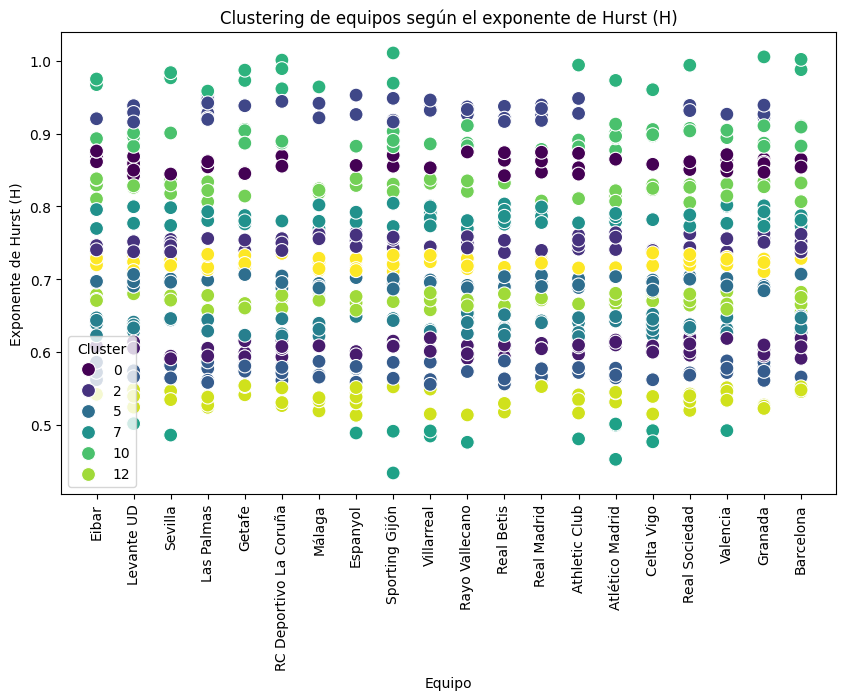

         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0         49.0  0.859177  0.009812  0.842293  0.853095  0.859106  0.865083   
1         68.0  0.604546  0.008315  0.590710  0.597071  0.605164  0.609641   
2         60.0  0.749137  0.008514  0.736609  0.740990  0.748676  0.755786   
3         43.0  0.932279  0.010588  0.915956  0.922584  0.932109  0.939350   
4         63.0  0.572313  0.009221  0.555513  0.564107  0.572056  0.579260   
5         48.0  0.695701  0.006314  0.684080  0.690676  0.695542  0.700558   
6         65.0  0.637058  0.009214  0.621144  0.630371  0.638504  0.644974   
7         59.0  0.785998  0.010208  0.769567  0.778312  0.783873  0.793966   
8         15.0  0.483101  0.018384  0.433729  0.478547  0.488661  0.491895   
9         20.0  0.981816  0.016102  0.958502  0.968920  0.980299  0.994158   
10        42.0  0.894934  0.010340  0.877316  0.886168  0.895067

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
df_hurst['hurst_scaled'] = scaler.fit_transform(df_hurst[['hurst']])

kmeans = KMeans(n_clusters=15, random_state=42)
df_hurst['cluster'] = kmeans.fit_predict(df_hurst[['hurst_scaled']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hurst, x='team', y='hurst', hue='cluster', palette='viridis', s=100)
plt.xticks(rotation=90)
plt.title("Clustering de equipos según el exponente de Hurst (H)")
plt.xlabel("Equipo")
plt.ylabel("Exponente de Hurst (H)")
plt.legend(title="Cluster")
plt.show()


cluster_summary = df_hurst.groupby('cluster')['hurst'].describe()
print(cluster_summary)

for cluster_id in df_hurst['cluster'].unique():
    print(f"\nCluster {cluster_id} - Equipos: {df_hurst[df_hurst['cluster'] == cluster_id]['team'].values}")
    avg_hurst = df_hurst[df_hurst['cluster'] == cluster_id]['hurst'].mean()
    if avg_hurst < 0.5:
        interpretation = "Tendencia a la difusión aleatoria (comportamiento más errático)"
    elif avg_hurst > 0.5:
        interpretation = "Tendencia a la persistencia (comportamiento más predecible)"
    else:
        interpretation = "Transición entre difusión aleatoria y persistencia"
    
    print(f"Promedio Hurst: {avg_hurst:.2f} - Interpretación: {interpretation}")


         start_x    start_y      end_x      end_y     hurst
0       0.000000   0.000000   0.736543  -5.327889  0.333702
1       0.736543  -5.327889  63.446561 -23.131316  0.333702
2      63.446561 -23.131316  67.781053 -28.540967  0.333702
3      67.781053 -28.540967  64.525925 -13.770547  0.333702
4      64.525925 -13.770547  12.586045  10.343488  0.333702
...          ...        ...        ...        ...       ...
12495  14.190422  78.637293  -1.232400  88.273057  0.410042
12496  -1.232400  88.273057  79.130850  68.003946  0.410042
12497  79.130850  68.003946  80.439959  56.125132  0.410042
12498  80.439959  56.125132  67.731789  65.968281  0.410042
12499  67.731789  65.968281  80.805953  78.017766  0.410042

[12500 rows x 5 columns]


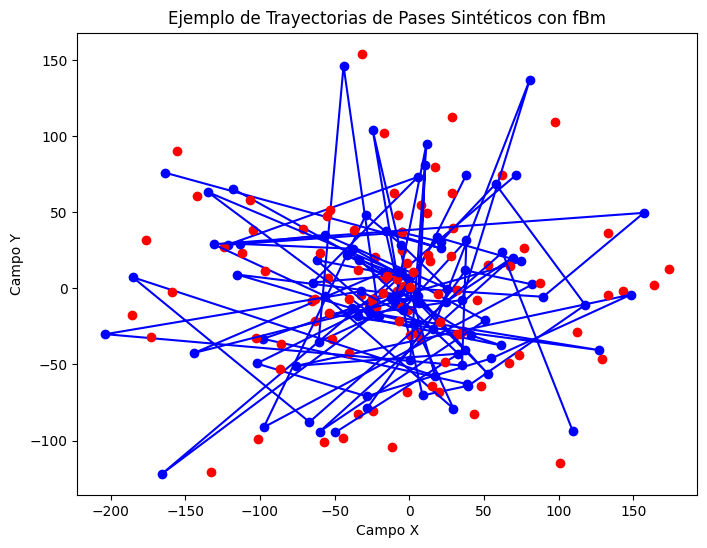

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbm import FBM

def generate_fbm_passes(num_sequences=100, num_passes=20, hurst_range=(0.3, 0.7)):
    data = []
    
    for _ in range(num_sequences):
        H = np.random.uniform(*hurst_range) 
        fBm = FBM(n=num_passes, hurst=H, length=1, method='daviesharte')
        
        traj_x = fBm.fbm() * 100  
        traj_y = fBm.fbm() * 68  
        
        start_x = traj_x[:-1]
        start_y = traj_y[:-1]
        end_x = traj_x[1:]
        end_y = traj_y[1:]
        
        for sx, sy, ex, ey in zip(start_x, start_y, end_x, end_y):
            data.append([sx, sy, ex, ey, H])
    
    df = pd.DataFrame(data, columns=['start_x', 'start_y', 'end_x', 'end_y', 'hurst'])
    return df

df_synthetic_passes = generate_fbm_passes(num_sequences=500, num_passes=25)
print(df_synthetic_passes)

plt.figure(figsize=(8, 6))
for _ in range(5):
    sample = df_synthetic_passes.sample(n=20)
    plt.plot(sample['start_x'], sample['start_y'], 'bo-')
    plt.plot(sample['end_x'], sample['end_y'], 'ro')
plt.title("Ejemplo de Trayectorias de Pases Sintéticos con fBm")
plt.xlabel("Campo X")
plt.ylabel("Campo Y")
plt.show()


In [ ]:
passes_Df